<h1 align="center"> TMA4320 Vitenskapelige beregninger</h1> 
<h2 align="center"> Prosjekt 3: Termisk fysikk, damptrykk for vann</h2> 

<h4 align="center"> av Ivar Sandvik, Jacek Stankiewicz & Mikael Bourmistrov </h4> 

### Innledning
I dette prosjektet skal vi fokusere på damptrykkurven til $\textrm{H}_2\textrm{O}$ ved mengden 1 mol. Kurven strekker seg fra trippelpunket til vann, som er der både is, flytende vann og damp kan sameksistere ved temperaturen $T = 0.01 \textrm{C}^\circ$ (eller $273,16\textrm{K}$) og trykket $p = 611.73\textrm{Pa}$ til det kritiske punket i $T \approx 364 \textrm{C}^\circ$ og $p \approx 25.8\textrm{MPa}$ (Pedersen, 2020)(Ormestad, 2023). Etter det kritiske punktet kan ikke lenger vann beskrives som enten gass eller væske, her sier vi at vannet er superkritisk. Over denne temperaturen vil det ikke være mulig å bringe vann i gassform over til væske ved å øke trykket ytterligere. Et velkjent punkt langs denne kurven er kokepunktet ved normaltykk ved $T = 100 \textrm{C}^\circ$ og $p \approx 1\textrm{atm} \approx 10^5\textrm{Pa}$. Å bekrive denne kurven kan vise seg å være en utfordring.

Prosjektet er delt inn i to oppgaver, som igjen er inndelt i deloppgaver. Vi kommer til å strukurere oppgaven i henhold til disse, men vil skilte tilstrekkelig for at dette skal bli en selvstendig rapport som kan leses og forstås uten oppgaveteksten vi tok utgangspunkt i. Se på oppgavene vi reffererer til som nummererte overskrifter, heller en en oppgavebesvarelse.

I dette prosjektet kommer vi til å starte med å løse Van der Waals tilstandsligning med Maxwells konstruksjon ved hjelp av numeriske metoder for å løse ikkelineære ligningssystem, for å prøve å komme frem til en rimelig beskrivelse av vann i likevet mellom væske og gass. Dette gjør vi skritt for skritt gjennom deloppgavene i oppgave 1, for så å sammenligne disse med eksperimentelle verdier. I oppgave 2 forsøker vi å interpolere en fullstendig beskrivelse av eksperimentell data med bruk av forskjellige metoder. Til slutt sammenligner vi resultatene våre for å evaluere hvorvidt modellene våre er gode beskriverlser av vann langs damptrykkurven.

## Oppgave 1: Van der Waals tilstandsligning og damptrykk

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import scipy

### 1a) Bestemme parameterne a og b, samt noen konstanter
 Parameterne a og b fra Van der Waals tilstandsligning kan utledes og løses for temperatur, trykk og volum i det kritiske punktet. Det vi utnytter her er at det kritiske punktet er et saddelpunkt langs den kritiske isotermen, sok vil si at den partiellderiverte til trykket med hensyn på volum er 1 i både 1. og 2. orden. Med dette kan vi løse ligningen for a og b:   

 $$p = \frac{RT}{V-b} - \frac{a}{V^2} \quad \Rightarrow \quad \frac{\partial p}{\partial V} = - \frac{RT}{\left( V-b\right)^2} + \frac{2a}{V^3} = 0 \quad \Rightarrow \quad RT = \frac{2a}{V^3} \left( V-b\right)^2 \,\: (1), \quad \textrm{og} \quad \frac{\partial^2 p}{\partial V^2} = \frac{2RT}{\left( V-b\right)^3} - \frac{6a}{V^4} = 0 \quad \Rightarrow \quad RT = \frac{3a}{V^4} \left( V-b\right)^3 \,\: (2).\newline$$

 $$\textrm{Ved å bruke at ligning} \: (1) = (2)\: \textrm{får vi:} \quad \frac{2a}{V^3} \left( V-b\right)^2 = \frac{3a}{V^4} \left( V-b\right)^3 \quad \Rightarrow \quad \frac{2}{3} = \frac{V-b}{V} = 1-\frac{b}{V} \quad \Rightarrow \quad \frac{b}{V} = 1-\frac{2}{3} = \frac{1}{3} \quad \Rightarrow \quad \boxed{V = 3b} \newline$$
 
 $$\Rightarrow \quad RT_c = \frac{2a}{V_c^3} \left( V_c-b\right)^2 = \frac{2a}{27b^3} \cdot 4b^2 = \frac{8a}{27b} \quad \Rightarrow \quad \boxed{T_c = \frac{8a}{27bR}}\:, \quad\textrm{og} \quad p_c = \frac{RT_c}{V_c-b} - \frac{a}{V^2} = \frac{R\cdot8a}{27b\cdot R \left( 3b-b\right)}- \frac{a}{9b^2} \quad \Rightarrow \quad \boxed{p_c = \frac{a}{27b^2}}\,.$$

Vi kan nå bruke uttrykkene for de kritiske punktene $T_c$ og $p_c$ og løse disse for a og b for å uttrykke dem med hensyn på de kritiske punktene slik:
$$\frac{T_c}{p_c} = \frac{8a}{27bR}\cdot\frac{27b^2}{a} = \frac{8b}{R} \quad \Rightarrow \quad \boxed{b = \frac{RT_c}{8p_c}} \quad \textrm{og} \quad \frac{T_c^2}{p_c} = \frac{64a^2}{27\cdot27\cdot b^2R^2}\frac{27b^2}{a} = \frac{64a}{27R^2} \quad \Rightarrow \quad \boxed{a = \frac{27R^2T_c^2}{64\,p_c}}\,.$$ 

Fra eksperimentelle data kjenner vi $\:T_c,\: p_c \:$ og $\:V_c\:$ for vann til å være  $\:T_c = 647,096\,\textrm{K}, \:p_c =  22,064\,\textrm{MPa}\;$ og $\: V_c = 55,948\,\textrm{mL}\, ,$ noe som gir $a \approx 0.553\; \mathrm{\frac{m^6Pa}{mol^2}}$ og $b \approx 3.048\cdot10^{-5}\mathrm{\frac{m^3}{mol}}.$ Vi definerer disse størrelsene i si-enheter i koden  i denne oppgaven. Dette er for utregningenes skyld, så konverteres størrelsene som skal plottes fortløpende til hensiktsmessige enheter for godt leselige plot. I denne oppgaven kommer vi alltid til å ta utgangspunkt i én mol vann når vi regner på Van der Waals tilstandsligning.

In [2]:
# Noen naturkonstanter vi kommer til å bruke i prosjektet, med enheter i kommentar:
R = 8.314                           # [J/mol K]
N = 6.02214 * 10e23                 # [mol^-1]

# Eksperimentelle verdier for de kritiske punktetne til vann:
Tc = 647.096                        # [K]
pc = 22.064e6                       # [Pa]
Vc = 55.948e-6                      # [m^3]

# De termiske empiriske konstantene a og b fra Van der Waals tilstandsligning for vann:
a = (27 * R**2 * Tc**2) / (64*pc)   # [m^6 Pa/mol^2]
b = (R*Tc) / (8*pc)                 # [m^3/mol]

# Kritisk volum:
Vc_analytic = 3*b
ΔV = Vc_analytic / Vc
print(ΔV)

1.634335401532854


Her ser vi at forholdet $\frac{V_canalytic}{V_c}$ fraviker ganske langt fra 1. Dette forteller oss at analytisk løsning og eksperimentelle data fraviker en del her, noe vi kommer til å se nermere på fidere i oppgave. I første omgang kommer i til å fokusere på den analytiske løsningen for å lage en god modell av Van der Waals tilstandsligning, for så å begynne å sammenligne denne med faktiske verdier.

### 1b) $p$ som funksjon av $V$

Nå som vi har definert nødvendige parametere og konstanter kan vi begynne å se på hvordan Van der Waals tilstandsligning ser ut. Her plotter vi trykket som funksjon av V $p(V)$ på volumintervallet $[75, 300] \textrm{mL}$ og temperaturen $T = T_c$:

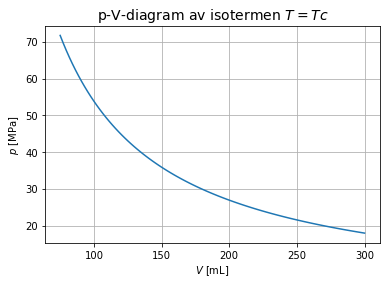

In [3]:
# Definer V-verdier:
V_list = np.linspace(75, 300, 100)              # 75 til 300 mL i [mL]

# Beregner trykket p som funksjon av V:
p_av_V =  (R*Tc/(V_list-b)) - (a/(V_list**2))   # Siden vi brukte V i mL (10^-6 [m^3]), blir enheten til resultatet av ligningen i [MPa]

# Plotter p(V):
plt.plot(V_list, p_av_V)                 
plt.grid()
plt.xlabel('$V$ [mL]')
plt.ylabel('$p$ [MPa]')
plt.title('p-V-diagram av isotermen $T = Tc$', fontsize = 14)
plt.show()

Vi ser her at for temperaturen $T_c$ er kurven sterkt synkende, og trøbbelet med å beskrive fluidet langs likevekt mellom gass og væske er ikke lenger relevant - damptrykkurven opphører i det kritiske punktet, og det er for nettopp denne temperaturen vi plotter trykket for her. Når vi skal begynne å løse Van der Waals ligning langs damptrykkurven for lavere temperaturer møter vi på flere utfordringer.

### 1c) Implementering av newtons metode

Vil løse den ikkelineære ligningen $\;\textrm{sinh}\!\left(\frac{2c}{T_c}\right) = 1\:$ ved hjelp av netwons metode. I første omgang implementerer vi den for én variabel. For nå velger vi $ c=1\ \textrm{K}$. Ligningen har kjent analytisk løsning $T_c = \frac{2c}{\textrm{ln}(1+\sqrt{2})}$ som lar oss sammenligne analytisk og nummerisk resultat: $T_c = \frac{2 \,\textrm{K}}{\textrm{ln}(1+\sqrt{2})} \approx \pm\,2.269 \, \textrm{K}$. Dette gjør vi for å senere utvide koden slit at vi kan løse sett med ikkelineære ligninger.

In [4]:
# Den ikkelineære ligningen vi skal løse hved hjelp av newtons metode:
def sinh_squared(x, c):
    if x == 0:                      # Sikrer at funksjonen er veldefinert over hele R.
        return np.inf
    else:
        return np.sinh(2*c/x)**2 - 1
    
# Den deriverte av funksjonen:
def dsinh_squared(x, c):
    return -(4*c * np.sinh((2*c)/x) * np.cosh((2*c)/x)) / x**2 

In [5]:
# Implementering av newtons metode for én variabel:
def newton(x0, max_iter, c, tol):
    x = x0                          # Holder startverdien x0 og sluttverdien x separat.       
    x_i = np.array([x0])
    
    if x0 == 0:                     
        print('Startverdien Tc = 0 gir 0-divisjon i første iterasjon, og newtons metode vil ikke fungere.')
        return x, x_i

    else:
        for i in range(max_iter):
            f_val = sinh_squared(x, c)
            df_val = dsinh_squared(x, c)

            # Setter en tolleranse, slik at koden stopper ved tilstrekkelig god tilnærming.
            if abs(f_val) < tol:    
                return x, x_i

            # En sjekk for 0-divisjon
            if df_val == 0:         
                print('Metoden deler på 0, og avbrytes.')
                return x, x_i
            
            # Oppdaterer x og x_i i henhold til newtons metode:
            x -= f_val/df_val
            x_i = np.append(x_i, x)

    print("Ingen løsning funnet innenfor iterasjonsmengden")

    return x, x_i

In [6]:
# Bestemmer nødvendige konstanter og løser ligningen:
c = 1                                               # Enhet [K]
max_iter = 100                                      # Antall ønskede iterasjoner i den numeriske metoden
tol = 1e-8                                          # Setter en tolleranse, slik at koden stopper ved tilstrekkelig god tilnærming.
Tc0 = 1                                             # Kvalifisert tipping som startverdi for itereringen
Tc_estimate, x_i = newton(Tc0, max_iter, c, tol)    # Kall av funkjsonen for å løse ligningen

# Regner ut analytisk verdi og sammenligner med den numeriske:
Tc_analytic = 2*c/np.log(1 + np.sqrt(2))            # Her er det to analytiske løsninger symetrisk om y-aksen.
diff = np.abs(np.abs(Tc_estimate)-Tc_analytic)      # Tar absoluttverdi av den numeriske løsningen for å sammenligne med, da newtons metode kan finne positiv og negativ løsning.

# Printer resultatene fra newtons metode:
if np.abs(sinh_squared(Tc_estimate, c)) > 0.5:
    print('Newtons metode greier ikke finne en god løsning med denne startverdien. Prøv å endre på Tc0.') 
print(f"Newtons metode gir løsningen Tc = {Tc_estimate}K med f(Tc) = {sinh_squared(Tc_estimate, c)}.\n")

# Sjekker hvor god den numeriske løsningen er i forhold til den analytiske:
if diff < 1e-4:
    print(f'Absolutt differanse mellom analytisk og numerisk løsing er: {diff}, en svært god tilnærming til en løsning.')
else:
    print(f'Absolutt differanse mellom analytisk og numerisk løsing er: {diff}.')

Newtons metode gir løsningen Tc = 2.26918531421302K med f(Tc) = 2.220446049250313e-15.

Absolutt differanse mellom analytisk og numerisk løsing er: 2.220446049250313e-15, en svært god tilnærming til en løsning.


Ligningen $\textrm{sinh}\!\left(\frac{2c}{T_c}\right) = 1$ har to løsninger som er symetriske om y-aksen, nemlig der funksjoen $f = \textrm{sinh}\!\left(\frac{2c}{T_c}\right) - 1$ krysser x-aksen. Når x går mot 0 går y mot uendelig, newtons metode vil derfor ikke være veldefinert for startverdien $T_{c\,0} = 0$ da hverken funkjsonen $f$ eller dens reriverte er veldefinert her. Videre konvergerer funskjonen $f$ raskt mot $-1$, noe som betyr at $f' = 0$ her, og itereringen avbrytes av 0-divisjon. I koden skjer dette fra området $\left|T_{c\,0}\right|> 4,7$. Når vi velger startverdi til newtons metode er vi derfor begrenset til verdier mellom $\pm 4,7$, og verdier som ikke er for nære 0 - da er $\left|f'\right|$ veldig stor, og itterasjonen hopper mye rundt. Metoden er istand til å finne både den positie og den negative løsningen, og får også til å komme seg på den andre siden av asymptoten i $x=0$ i folhold til startverdien man oppgir, så alt i alt er dette en solid metode for å finne nullpunkter. Man må bare ha litt kunnskap om funksjonen man ønsker å finne nullpunktene til. Vi kan senere at denne sensitiviteten til startverdier øker for newtons metode for flere variabler.

### 1d) Konvergensgraden til newtons metode

Forskjellige numeriske metoder kovergerer forskjellig raskt. For å undersøke hvor raskt vår implementering av newtons metode konvergerer kan man undersøke rekken av løsninger vi returnerte i newton-funksjonen, og undersøke hvor raskt følgen $e_i = \left| x_i - r\right|$ går mot null. Her er rekken et mål for hvor hvor stor feilen på estimatet er i forhold til den nådde løsningen $r$ per itterasjon. Konvergensorden $q$ til newtons metode er kjent til å være kvadratisk, alstså $q=2$, og denne kan finnes ved å undersøke hva følgen $p_i = \frac{\log({e_i/e_{i-1}})}{\log({e_{i-1}/e_{i-2}})}$ konvergerer mot.    

In [7]:
def convergence_order(x0, max_iter, c, tol):
    x, x_arr = newton(x0, max_iter, c, tol)
    e_arr = np.abs(x_arr - x)
    p_arr = np.array([], dtype = np.double)

    for i in range(2,len(e_arr)):
        if e_arr[i] != 0:                   # Sjekker om differansen e_i når 0, og hopper over utregningen som vil gi nulldivisjon.
            p_i = np.log10(e_arr[i]/e_arr[i-1]) / np.log10(e_arr[i-1]/e_arr[i-2])
            p_arr = np.append(p_arr, p_i)
        else:
            e_arr = np.append(e_arr, 0)     # Legger til 0 i slutten av p_arr om e_arr når 0 manuelt.
            return e_arr, p_arr

    return e_arr, p_arr

p_i konvergerer til 1.99936 iløpet av 6 iterasjoner. Dette er veldig nært den analytiske konvergensorden q=2 til newtons metode.


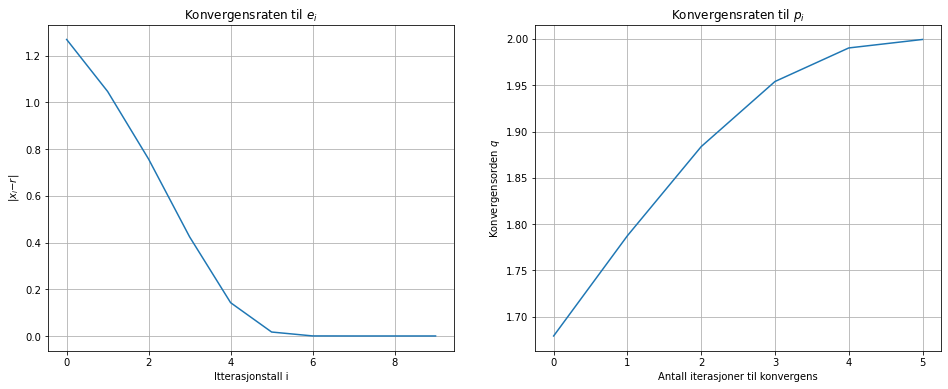

In [8]:
# Kaller funksjonen convergence_order og printer resultatene:
e_arr, p_arr = convergence_order(Tc0, max_iter, c, tol)
q = p_arr[-1]

if np.abs(q-2) < 0.01:        # Velger en toleranse for å sjekke hvor godt p_i konverrgerer mot den kjente konvergensorden q til newtons metode.
    print(f'p_i konvergerer til {round(q, 5)} iløpet av {len(p_arr)} iterasjoner. Dette er veldig nært den analytiske konvergensorden q=2 til newtons metode.')
else:
    print(f'p_i konvergerer til {round(q, 5)} iløpet av {len(p_arr)} iterasjoner.')


# Plotter konvegensraten til netwons metode e_arr og konvergensorden som p_arr konvergerer mot i samme subplot:
fig, ax = plt.subplots(1, 2, figsize=(16, 6)) 

ax[0].plot(e_arr)                  
ax[1].plot(p_arr)               

ax[0].title.set_text('Konvergensraten til $e_i$')
ax[1].title.set_text('Konvergensraten til $p_i$')

ax[0].grid()
ax[1].grid()

ax[0].set_xlabel('Itterasjonstall i')
ax[0].set_ylabel('$|x_i − r|$')
ax[1].set_xlabel('Antall iterasjoner til konvergens')
ax[1].set_ylabel('Konvergensorden $q$')

plt.show()

Over er et plott av konvergensraten til følgen $e_i$ og følgen $p_i$ som konvergerer mot konvergensgraden $q$ til newtons metode. Her kan det lønne seg å velge en startverdi $T_{c\,0}$ som krever en del iterering. Velger man verdier som 2 eller 4 konvergerer newtons metode svært rask, og $x_i$-følgen inneholder bare en håndfull med verdier, og dermed vil konvergensen komme dårlig frem i plottet. Velger man startverdier som $T_{c\,0} = 0.1$ får man mange flere itereringer før newtons metode finner en rot, og konvergensen til følgene $e_i$ og $p_i$ blir glattere, og dermed litt tydeligere visuelt i de to plottene over. 

### 1e) Newtons metode for å løse Van der Waals tilstandsligning med Maxwells konstruksjon

Vi ser nå på de to ligningene (11) og (12) fra oppgaveteksten som er utledet fra Maxwells konstruksjon, og ut ifra dem definerer vi funksjonene $f$ og $g$. Det er disse vi vil finne nullpunktene til ved å løse ligningssettet $f = 0$ og $g = 0$: 
$$f(V_g, V_v) = \frac{RT}{V_g-b}-\frac{a}{V_g^2} - \frac{RT}{V_v-b} + \frac{a}{V_v^2} = 0 \\
g(V_g, V_v) = \frac{RT}{V_g-V_v}\cdot\textrm{ln} \left( \frac{V_g-b}{V_v-b} \right) - \frac{a}{V_gV_v} - \frac{RT}{V_g-b} + \frac{a}{V_g^2} = 0$$

Siden de begge er funkjsoner av to veriabler og de begge er ikkelineære trenger vi en linearisering som tilnærming. Lineariseringen vi skal bruke er taylorutviklingen rundt en tilnærming $\hat{\textbf{x}}$ til roten til løsningen - noe som betyr at vi trenger å være ganske nære roten for at tilnærmingen skal være god. Vi nøyer oss her med taylorutviklingen av 1. orden, utviklingen ser slik ut på generell form: $\textbf{f}(\hat{\textbf{x}}) + J (\hat{\textbf{x}})(\textbf{x}-\hat{\textbf{x}})= 0$ hvor $J$ er Jacobimatrisen bestående av de partiellderiverte av $f$ og $g$ med hensyn på de to variablene. Vi trenger derfor de fire partiellderiverte av $f$ og $g$ av 1. orden:

$$ \frac{\partial f}{\partial V_g} = \frac{2a}{V_g^3} - \frac{RT}{\left( V_g-b \right)^2} \quad \textrm{og} \quad \frac{\partial f}{\partial V_v} = \frac{RT}{\left( V_v-b \right)^2} - \frac{2a}{V_v^3}, $$ 

$$\frac{\partial g}{\partial V_g} = RT \left( \frac{1}{(V_g-b)(V_g-V_v)} - \frac{\textrm{ln} \left( \frac{V_g-b}{V_v-b}\right)}{(V_g-V_v)^2}\right) + \frac{a}{V_vV_g^2} + \frac{RT}{(V_g-b)^2} -\frac{2a}{V_g^3} \quad \textrm{og} \quad \frac{\partial g}{\partial V_v} = RT \left( \frac{\textrm{ln}\left( \frac{V_g-b}{V_v-b}\right)}{(V_g-V_v)^2} + \frac{1}{(V_g-b)(V_g-V_v)}\right) + \frac{a}{V_gV_v^2}$$

In [9]:
# Definerer funksonen f(Vg, Vv):
def f(Vg,Vv,T):
    return R*T/(Vg-b) - a/Vg**2 - R*T/(Vv-b) + a/Vv**2

# Definerer funkjsonen g(Vg, Vv):
def g(Vg,Vv,T):
    return (R*T/(Vg-Vv)) * sp.log((Vg-b)/(Vv-b)) - a/(Vg*Vv) - R*T/(Vg-b) + a/Vg**2

In [10]:
# Implementering av newtons metode for et ligningssystem av to funksjoner med to variabler: 
def newton_2D(f, g, x_0, y_0, tol, max_iter, T):

    # Regner ut de partiellderiverte til f og g med hennsyn til de to variablene Vg og Vv ved hjelp av scipy:
    Vg = sp.Symbol('Vg')
    Vv = sp.Symbol('Vv')
    sy_T = sp.Symbol('T')

    # Deriverer med scipy:
    temp1 = sp.diff(f(Vg, Vv, sy_T), Vg)
    temp2 = sp.diff(f(Vg, Vv, sy_T), Vv)
    temp3 = sp.diff(g(Vg, Vv, sy_T), Vg)
    temp4 = sp.diff(g(Vg, Vv, sy_T), Vv)

    # Lager callbare funkjsoner av de deriverte:
    f_dVg = sp.lambdify([Vg, Vv, sy_T], temp1, modules="sympy")
    f_dVv = sp.lambdify([Vg, Vv, sy_T], temp2, modules="sympy")
    g_dVg = sp.lambdify([Vg, Vv, sy_T], temp3, modules="sympy")
    g_dVv = sp.lambdify([Vg, Vv, sy_T], temp4, modules="sympy")

    # Definerer variabler som brukes i while-loopen:
    solution_list = []
    solution_list.append([np.array([x_0]),np.array([y_0])])
    x = solution_list[-1][0][0]
    y = solution_list[-1][1][0]
    iter = 0

    # En loop som itererer frem til en god løsning er nådd, eller maksimal
    while ((f(x, y, T) > tol) or (g(x, y, T) > tol) or (f(x, y, T) < -tol) or (g(x, y, T) < -tol)) and (iter <= max_iter):
        x, y = solution_list[-1][0][0], solution_list[-1][1][0]
        F = np.array([[f(x,y,T)], [g(x,y,T)]], dtype=np.double)                                             # Array av ligningsystemene
        J = np.array([[f_dVg(x, y, T), f_dVv(x, y, T)], [g_dVg(x, y, T), g_dVv(x, y, T)]], dtype=np.double) # Lager Jacobi-matrisen av de partielldeiverte over
        dx = np.linalg.solve(J, -F)                                                                         # Løser ligningssystemet J*dx = F
        solution_list.append(solution_list[-1] + dx)                                                        # Appender løsningen til solution_list
        iter += 1                                                                                           # Sørger for at wile-loopen ikke går uendelig

    return solution_list 

In [11]:
# Løser ligningssystemet av f og g for Vg og Vv:
def V_of_T():                                               # Vi kjører denne løsningen i en funksjon for å unngå krøll med å navngi "globale" variabler
    T_arr = np.linspace(274, 647, 647-274, dtype = int)     # Lager en liste med alle heltallstemperaturene i intervallet, enhet [K].
    x, y = 12e-3, 36e-6                                     # Kvalifisert tipping av Vg og Vv, her med variabelmnavn x og y, i enheten [m^3]. Obs, Vg=Vv gir nulldivisjon. Det samme gjelder om én eller begge av startverdiene er 0.
    s_list = []                                             # Lager tom liste som skal fylles med løsninger av Vg og Vv.

    # Itererer gjennom alle T i T_arr, og løser ligningssystemet for hver temperatur i linspacet hver for seg, og appender løsningene
    for T in T_arr:
        s_list.append(newton_2D(f, g, x, y, tol, max_iter, T)[-1])
        x, y = s_list[-1][0][0], s_list[-1][1][0]           # setter den nye "kvalifiserte tippingen" til de siste løsningene for Vg og Vv.

    return np.array(s_list)                                 # Gjør om løsningene til en numpy array, løsningene har enheten [m^3]

s_array = V_of_T()

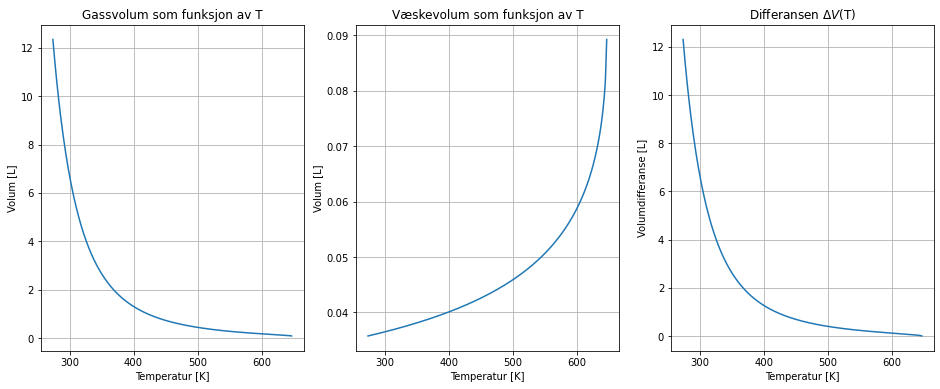

In [12]:
# Plotter resultatet av netwons metode, så Vg og Vv mot T:
T_arr = np.linspace(274, 647, 647-274, dtype = int)     # En array av heltallstemperaturene (mellom 274 og 647 K) som vi skal bruke videre
      
fig, ax = plt.subplots(1, 3, figsize=(16, 6)) 

ax[0].plot(T_arr, s_array[:,0] * 1e3)                  # 
ax[1].plot(T_arr, s_array[:,1] * 1e3)                  # Konverterer volumet til [L] fra [m^3] for å gjøre plottet mer leselig.
ax[2].plot(T_arr, (s_array[:,0] - s_array[:,1]) * 1e3) #

ax[0].title.set_text("Gassvolum som funksjon av T")
ax[1].title.set_text("Væskevolum som funksjon av T")
ax[2].title.set_text("Differansen $\Delta V$(T)")

ax[0].grid()
ax[1].grid()
ax[2].grid()

ax[0].set_xlabel('Temperatur [K]')
ax[0].set_ylabel('Volum [L]')
ax[1].set_xlabel('Temperatur [K]')
ax[1].set_ylabel('Volum [L]')
ax[2].set_xlabel('Temperatur [K]')
ax[2].set_ylabel('Volumdifferanse [L]')

plt.show()

Her har vi kjørt Newtons metode for å løse ligingssettet av $f$ og $g$ for $V_g$ og $V_v$ for alle temperaturene vi er interessert i. Dette krever, som i oppgave 1c), høy presisjon i startverdiene. Videre krever det at vi oppdaterer startverdiene for hver iterering, for en høyere temperatur vil ikke lenger den første startverdien duge. Dette gjør vi ved å fortløpende oppdatere de nye startverdiene til de forrige røttene som ble funnet. Vi plotter resultatene for $V_g$ og $V_v$ for hver tilhørende temperatur, samt differansen mellom dem over. Vi kan se at differansen ser mer eller mindre helt identisk ut til plottet av $V_g$. Dette gir mening, da gassvolumet er så mye større at det overkjører væskevolumet totalt.

### 1f) Sammenligne vår modell av Van der Waals ligning med eksperimentell data

In [13]:
# Her defineres Van der Waals tilstandsligning, med a og b fra 1a) som tar inn de parameterne har data i:
def Van_der_Waal(V, T):
    return R*T/(V-b) - a/V**2

For å kunne sammenligne eksperimentelle data med vår modell trenger vi å importere en fil med dataene vi trenger. Vi henter denne dataen fra the Engeneering Toolbox, og laster inn filene (Engineering ToolBox, 2018):

In [14]:
# Importerer eksperimentell data-fil for damptrykk mellom trippelpunktet og det kritiske punktet: 
liquid_vals = np.genfromtxt("liquid_data.txt", dtype="float")

# Lagrer de dataene vi trenger i lister:
T_exp = liquid_vals[:, 0]                   # [K]
p_exp = liquid_vals[:, 2]                   # [Bar]

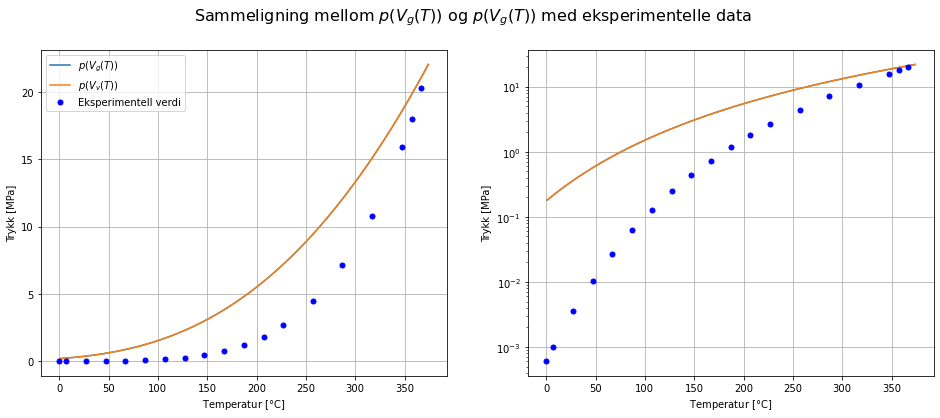

In [15]:
# Regner ut p(Vg):
p_Vg = np.zeros(len(T_arr), dtype=float)
for i in range(len(T_arr)):               
    Vgi = s_array[i, 0]
    p_Vg[i] = Van_der_Waal(Vgi, T_arr[i])                                                # [Pa]

# Regner ut p(Vv):
p_Vv = np.zeros(len(T_arr), dtype=float)
for i in range(len(T_arr)):
    Vvi = s_array[i, 1]
    p_Vv[i] = Van_der_Waal(Vvi, T_arr[i])                                                # [Pa]

# Plotter Vg(T), Vv(T) og p(T) numerisk mot eksperimentelt:
fig, ax = plt.subplots(1,2, figsize = (16, 6))

ax[0].plot(T_arr - 273, p_Vg * 1e-6, label='$p(V_g(T))$')                                 # Konverterer temperaturene til C for å mer intuitivt kunne lese av hvor koke- og frysepunkt ligger i grafen.
ax[0].plot(T_arr - 273, p_Vv * 1e-6, label='$p(V_v(T))$')                                 # Skalerer trykket til MPa for plotting
ax[0].plot(T_exp - 273, p_exp * 1e-1, 'bo', markersize=5, label='Eksperimentell verdi')

ax[1].semilogy(T_arr - 273, p_Vg * 1e-6, label='$p(V_g(T))$')                                 
ax[1].semilogy(T_arr - 273, p_Vv * 1e-6, label='$p(V_v(T))$')                                
ax[1].semilogy(T_exp - 273, p_exp * 1e-1, 'bo', markersize=5, label='Eksperimentell verdi')

ax[0].grid()
ax[1].grid()

ax[0].set_xlabel('Temperatur [$\degree$C]')
ax[0].set_ylabel('Trykk [MPa]')
ax[1].set_xlabel('Temperatur [$\degree$C]')
ax[1].set_ylabel('Trykk [MPa]')

fig.suptitle('Sammeligning mellom $p(V_g(T))$ og $p(V_g(T))$ med eksperimentelle data', fontsize=16)
ax[0].legend( )

plt.show()

Her ligger $V_g(T)$ og $V_v(T)$ på hverandre. Dette er forventet da trykket for begge volumene per definisjon er likt etter Van der Waals tilstandsligning løst med Maxwells konstruksjon. Varialene $V_g$ og $V_v$ er løst med de to ligningene $f$ og $g$ som kommer ut av Maxwells konstruksjon, hvor disse to punktene ligger ved akkuratt det samme trykket. Her plotter vi både absolutt differanse og med trykk plottet logaritmist, slik at avviket ved lave trykk også kommer tydelig frem. Her er det tydelige avvik. Vi vil ikke kunne bruke denne modellen for å forutsi den eksakte oppførselen til vann, som kokepunkt ved forskjellige trykk, men som vi skal se på i oppgaven under er modellen fremdeles nyttig for å illustrere den generelle oppførselen til vann. 

### 1g) Plot av Van der Waals tilstandsligning for konstant T med Maxwells konstruksjon

Nå ønsker vi å illustrere Maxwellkonstruksjonen vi har snakket så mye om. Her har vi valgt en temperatur $T=550 \, \textrm K$. Alle temperaturer mellom trippelpunktet og det kritiske punktet kan velges.

In [16]:
# Definerer konstantene T og volum-imtervallet vi vil plotte Van der Waals tilstandsligning for:
T_const = 550                                                          # [K]
V_arr = np.linspace(40e-6, 400e-6, 100)                                # Velger et hensiktsmessig volum-intervall å potte Van der Waals tilstandsligning over. Enhet i [m^3]

# Beregner Van der Waals kurve for gitt temperatur T:
p_arr = np.zeros(len(V_arr))
p_arr = Van_der_Waal(V_arr, T_const)

# Lager de to punktene (Vg, p(Vg)) og (Vv, p(Vv)) langs tilstandskurven:
temp_V = s_array[T_const-274]
point_Vg = [temp_V[0][0]*1e6, Van_der_Waal(temp_V[0][0], T_const)*1e-5] # Konverterer volumet til [mL] fra [m^3], og trykket til [Bar] fra [MPa]
point_Vv = [temp_V[1][0]*1e6, Van_der_Waal(temp_V[1][0], T_const)*1e-5] #

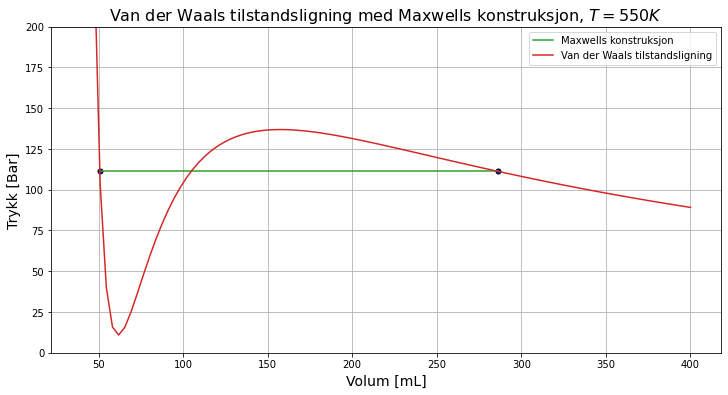

In [17]:
# Plotter resultatet:
plt.figure(figsize = (12, 6))

plt.plot(point_Vg[0], point_Vg[1], marker = "o", markersize = 5, markeredgecolor = "black", markerfacecolor = "blue")
plt.plot(point_Vv[0], point_Vv[1], marker = "o", markersize = 5, markeredgecolor = "black", markerfacecolor = "blue")
plt.plot([point_Vg[0], point_Vv[0]], [point_Vg[1],point_Vv[1]], label = 'Maxwells konstruksjon')

plt.plot(V_arr*1e6, p_arr*1e-5, label='Van der Waals tilstandsligning')   # Konverterer volumet til [mL] fra [m^3], og trykket til [Bar] fra [MPa]
plt.grid()

plt.xlabel('Volum [mL]', fontsize=14)
plt.ylabel('Trykk [Bar]', fontsize=14)

plt.ylim([0, 200])                                                               
plt.title('Van der Waals tilstandsligning med Maxwells konstruksjon, $T = 550K$', fontsize=16)
plt.legend()

plt.show()

I plottet kan vi se hvordan Van der Waals tilstandsligning oppfører seg i det ufysiske området for $T$ mellom det kritiske punktet og trippelpunktet, og hvordan Maxwells konstruksjon erstatter dette intervallet fra punktet $V_v$ til $V_g$ henholdsvis fra venstre til høyre.

### 1h) p-V-fasediagran for $\textrm{H}_2\textrm{O}$

Med det vi har definert til nå kan vi plotte et fasediagram mellom $\textrm{H}_2\textrm{O}$ i væske, gass og i den superkritiske tilstanden i et pV-fasediagram.

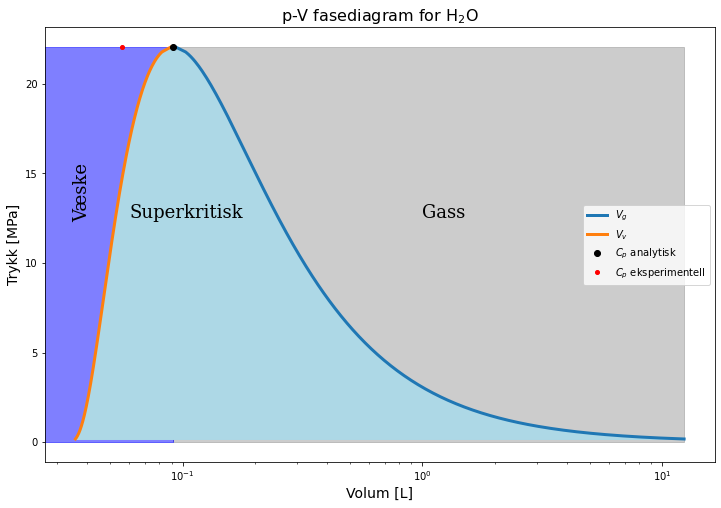

In [18]:
# Her plotter vi p-V-fasediagrammet. Skaleringsfaktorene er for å få enhetene i noe mer leselig. Volumet til [L] fra [m^3] (1e3), og trykket til [MPa] fra [Pa] (1e-6)
Vg = s_array[:,0].T[0] * 1e3 
Vv = s_array[:,1].T[0] * 1e3

plt.figure(figsize = (12, 8))

plt.plot(Vg, p_Vv * 1e-6, label='$V_g$', linewidth=3.0)
plt.plot(Vv, p_Vg * 1e-6, label='$V_v$', linewidth=3.0)
plt.plot(Vc_analytic * 1e3, pc * 1e-6, "o", markeredgecolor="black", markerfacecolor="black", label='$C_p$ analytisk')
plt.plot(Vc * 1e3, pc * 1e-6, "o", markersize=4, markeredgecolor="red", markerfacecolor="red", label='$C_p$ eksperimentell')

pc_line = plt.axhline(y=pc * 1e-6, linestyle='--', color='red', alpha=0)
plt.fill_betweenx(y=np.linspace(0, pc* 1e-6), x1=Vg[0], x2=Vc_analytic * 1e3, alpha=0.4, color='grey')
plt.fill_betweenx(y=np.linspace(0, pc* 1e-6), x1=Vc_analytic * 1e3, x2=0, alpha=0.5, color='blue')
plt.fill_betweenx(y=p_Vv * 1e-6, x1=Vg, x2=Vv, alpha=1, color='lightblue')

plt.text(3.5*1e-2, 12.5, 'Væske', rotation = 90, fontsize = 18, family = 'serif')
plt.text(0.6*1e-1, 12.5, 'Superkritisk', fontsize = 18, family = 'serif')
plt.text(10e-1, 12.5, 'Gass', fontsize = 18, family = 'serif')

plt.xlabel('Volum [L]', fontsize=14)
plt.ylabel('Trykk [MPa]', fontsize=14)
plt.title('p-V fasediagram for H$_2$O', fontsize=16)

plt.xscale('log')

plt.legend()
plt.show()

Selv om vi stadfestet tidligere at denne modellen ikke er eksakt, så illustrerer den frendeles den generelle oppførsellen til vann langd damptrykkurven på en god måte. Vi plottet den eksperimentelle verdien for volum i det kritiske punktet som et rødt punkt for å få illustrert at dette ikke samsvarer eksakt med oppførselen til vann. 

## Oppgave 2

### 2a) Innhenting av eksperimentelle verdier 

In [19]:
mole = 0.018015                  # [kg/mol]
T_arr = np.linspace(274, 647, 647-274)

liquid_vals = np.genfromtxt("liquid_data.txt", dtype="float")
gas_vals = np.genfromtxt("gas_data.txt", dtype="float")
hov_vals = np.genfromtxt("hov_data.txt", dtype="float")

T_exp = liquid_vals[:, 0]        # [K]

Vv_exp = mole/liquid_vals[:, 3]  # Enhet av liquid/gas_vals er i [kg/m^3], med å ta mole/data, vil vi få enhetene i [m^3], antatt vi holder på med 1 mol H2O
Vg_exp = mole/gas_vals[:, 3]     #

L_T_exp = hov_vals[:,0]+274      # [K] importerer separat temperatur for L, skala på "Heat of vaporization" er forskjellig fra Vv og Vg
L_exp = hov_vals[:,2]            # [J/mol]

### 2b) Optimize.curve_fit for tilpassning av $V_v$, $V_g$ og $L$ som funksjon av T

In [20]:
from scipy.optimize import curve_fit    # Importerer funksjonene her, ellers kjører ikke programmet
from functools import partial

In [21]:
# Definerer modellfunksjonene for Vv, Vg og L som skal brukes i optimize.curve_fit
def polynomial_7th(T, a, b, c, d, e, f, g, h):         # Modellfunskjon for Vv, Vg og L
    return a*T**7 + b*T**6 + c*T**5 + d*T**4 + e*T**3 + f*T**2 + g*T + h

def L_exp_func(T, a, b, c):                            # Modellfunskjon for L, gitt i hintet
     return c * np.power(np.abs(a - T), b)

def polynomial_7th10power(T, a, b, c, d, e, f, g, h):  # Modellfunskjon for Vg
    return 10**(a*T**7 + b*T**6 + c*T**5 + d*T**4 + e*T**3 + f*T**2 + g*T + h)

In [22]:
# Definerer konstantene for funksjonene, og legger dem i lister
Vg_fit_constants = curve_fit(polynomial_7th, T_exp, np.log10(Vg_exp))[0] # Her tar vi log10 av Vg_exp for å lettere replikere funksjonen nøyaktig, så tar vi å setter grunntallet som 10 etterpå
Vv_fit_constants = curve_fit(polynomial_7th, T_exp, Vv_exp)[0]
L_fit_constants = curve_fit(L_exp_func, L_T_exp, L_exp, p0 = [Tc, 1, 10])[0]
L_fit_constants_poly = curve_fit(polynomial_7th, L_T_exp, L_exp)[0]

# Definerer nye, optimaliserte funskjoner der konstantene nå er bestemt
Vg_optimized = partial(polynomial_7th10power, a=Vg_fit_constants[0], b=Vg_fit_constants[1], c=Vg_fit_constants[2], d=Vg_fit_constants[3], e=Vg_fit_constants[4], f=Vg_fit_constants[5], g=Vg_fit_constants[6], h=Vg_fit_constants[7])
Vv_optimized = partial(polynomial_7th, a=Vv_fit_constants[0], b=Vv_fit_constants[1], c=Vv_fit_constants[2], d=Vv_fit_constants[3], e=Vv_fit_constants[4], f=Vv_fit_constants[5], g=Vv_fit_constants[6], h=Vv_fit_constants[7])
L_optimized = partial(L_exp_func, a=L_fit_constants[0], b=L_fit_constants[1], c=L_fit_constants[2])
L_optimized_poly = partial(polynomial_7th, a=L_fit_constants_poly[0], b=L_fit_constants_poly[1], c=L_fit_constants_poly[2], d=L_fit_constants_poly[3], e=L_fit_constants_poly[4], f=L_fit_constants_poly[5], g=L_fit_constants_poly[6], h=L_fit_constants_poly[7])

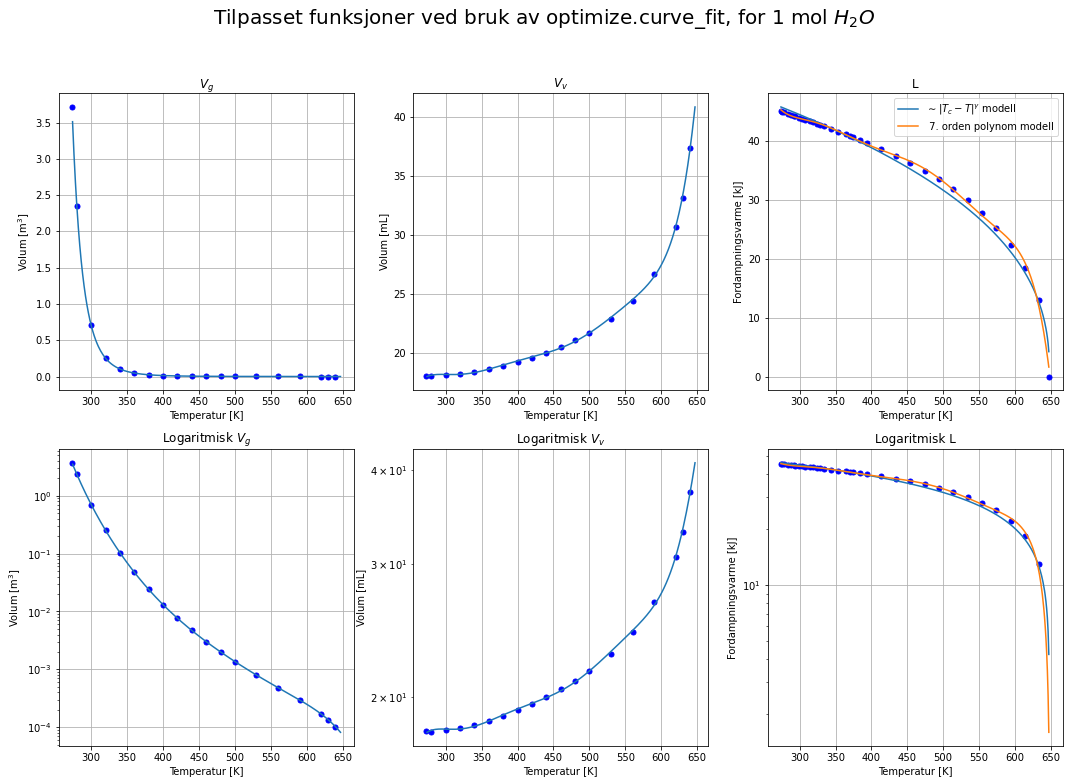

In [23]:
# Plotter grafene
fig, ax = plt.subplots(2, 3, figsize = (18, 12))
 
ax[0, 0].plot(T_exp, Vg_exp,"bo", markersize=5)
ax[0, 0].plot(T_arr, Vg_optimized(T_arr))

ax[0, 1].plot(T_exp, Vv_exp * 1e6, "bo", markersize=5)                                  # Skalerer Vv med 1e6 for å gå fra [m^3] til [mL] 
ax[0, 1].plot(T_arr, Vv_optimized(T_arr) * 1e6)                                         #

ax[0, 2].plot(L_T_exp, L_exp * 1e-3, "bo", markersize=5)                                #
ax[0, 2].plot(T_arr, L_optimized(T_arr) * 1e-3, label="$\sim |T_c -T|^\gamma$ modell")  # Skalerer L med 1e-3 for å gå fra [J] til [kJ]
ax[0, 2].plot(T_arr, L_optimized_poly(T_arr) * 1e-3, label=" 7. orden polynom modell")  #

ax[0, 0].grid()
ax[0, 1].grid()
ax[0, 2].grid()

ax[0, 0].set_xlabel('Temperatur [K]')
ax[0, 0].set_ylabel('Volum [m$^3$]')
ax[0, 1].set_xlabel('Temperatur [K]')
ax[0, 1].set_ylabel('Volum [mL]')
ax[0, 2].set_xlabel('Temperatur [K]')
ax[0, 2].set_ylabel('Fordampningsvarme [kJ]')

ax[0, 0].title.set_text("$V_g$")
ax[0, 1].title.set_text("$V_v$")
ax[0, 2].title.set_text("L")

# Semilogy plotting
ax[1, 0].semilogy(T_exp, Vg_exp,"bo", markersize=5)
ax[1, 0].semilogy(T_arr, Vg_optimized(T_arr))

ax[1, 1].semilogy(T_exp, Vv_exp * 1e6, "bo", markersize=5)
ax[1, 1].semilogy(T_arr, Vv_optimized(T_arr) * 1e6)

ax[1, 2].semilogy(L_T_exp, L_exp * 1e-3, "bo", markersize=5) 
ax[1, 2].semilogy(T_arr, L_optimized(T_arr) * 1e-3)  
ax[1, 2].semilogy(T_arr, L_optimized_poly(T_arr) * 1e-3)  

ax[1, 0].grid()
ax[1, 1].grid()
ax[1, 2].grid()

ax[1, 0].set_xlabel('Temperatur [K]')
ax[1, 0].set_ylabel('Volum [m$^3$]')
ax[1, 1].set_xlabel('Temperatur [K]')
ax[1, 1].set_ylabel('Volum [mL]')
ax[1, 2].set_xlabel('Temperatur [K]')
ax[1, 2].set_ylabel('Fordampningsvarme [kJ]')

ax[1, 0].title.set_text("Logaritmisk $V_g$")
ax[1, 1].title.set_text("Logaritmisk $V_v$")
ax[1, 2].title.set_text("Logaritmisk L")

# Resten av plottingen
fig.suptitle('Tilpasset funksjoner ved bruk av optimize.curve_fit, for 1 mol $H_2O$ ', fontsize=20)
ax[0, 2].legend()

plt.show()

curve_fit funksjonen bruker ikke-linære minste kvadraters metode, for å tilpasse data til en modellfunksjon. Vi har definert forskjellige funksjoner for de forskjellige datasette, som vi prøver å tilpasse data til. Selv om den eksperimentelle dataen ser ut til å ha veldig forskjellige form, kan alle datasette tilpasses ved en polynomfunksjon. Ideelt ville vi ha brukt en polynom av n-1 orden, der n er antallet datapunkter vi vil tilpasse seg til, siden da kunne vi kalle metoden vår polynom tilpassing. Dessutten var dette ikke praktisks i vårt tilfellet, som er hvorfor vi holdte oss til syvende grads polynom. Ved å approksimere dataene med en høyre grads polynom, fører til Runge's fenomen, hvor en polynomtilpassing oscilerer rundt dataen. Dette kan observeres på våre grafer. Vi valgte derfor å implementere en alternativ modellfunksjon for data av fordampningsvarmen; $a|T_c - T|^\gamma$. Det er viktig å huske at det er fysiske fenomener vi forsøker å modellere, fysikse fenomener som mest sannsynligvis ikke ville ha hatt oscilasjoner som kommer fram på grunn av polynom tilpassningen. Om det er den alternative funksjonen eller polynom tilpassingen er best, ville avhenge av formålet med interpolasjonen; hvor mye varians vil vi akseptere, tilpassingen, generell trenden vi vil modelre, etc.

### 2c) Numerisk anslag av $p(T)$ gjennom Simpsons metode

In [24]:
def simpsons_method(f,a,b,n):
    x_arr = np.linspace(a, b, 2*n)
    h = (b-a)/(2*n)
    f_sum = f(x_arr[0])+f(x_arr[-1])      # Tar hensyn til at første og siste verdi er ikke multiplisert med noe
    for i, val in enumerate(x_arr[1:-1]): # [1:-1] for å ikke iterere siste og første verdi
        if i % 2 == 1:
            f_sum += f(val)*4
        else:
            f_sum += f(val)*2
    return (h*f_sum)/3

In [25]:
# Definerer dp(T) funksjonene som skal brukes i simpsons metode
def d_p_best_fit(T):
    return L_optimized(T)/((Vg_optimized(T)-Vv_optimized(T))*T)

def d_p_best_fit_poly(T):
    return L_optimized_poly(T)/((Vg_optimized(T)-Vv_optimized(T))*T)

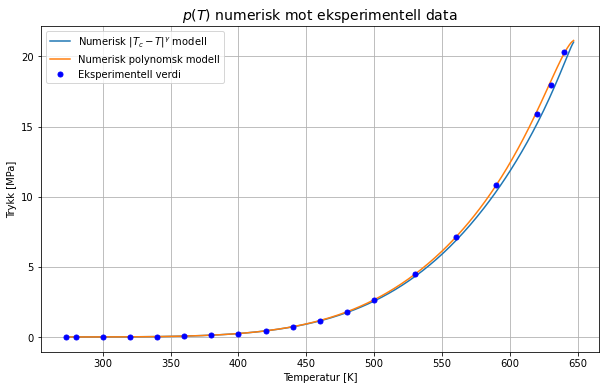

In [26]:
# Regner ut det numeriske anslaget av p(T), ved bruk av simpsons metode
p_best_fit_vals, p_best_fit_vals_poly = np.zeros(len(T_arr)), np.zeros(len(T_arr))

p_best_fit_vals = simpsons_method(d_p_best_fit,T_arr[0], T_arr, 1000)           
p_best_fit_vals_poly = simpsons_method(d_p_best_fit_poly,T_arr[0], T_arr, 1000) 

# Plotting
plt.figure(figsize = (10, 6))
plt.plot(T_arr, p_best_fit_vals * 1e-6 , label = "Numerisk $|T_c -T|^\gamma$ modell")          # Konverterer fra [Pa] til [MPa]
plt.plot(T_arr, p_best_fit_vals_poly * 1e-6 , label = "Numerisk polynomsk modell")             # --//--
plt.plot(T_exp, p_exp * 1e-1, 'bo', markersize = 5, label = "Eksperimentell verdi")            # Konverterer bar til [MPa]
plt.grid()
plt.xlabel("Temperatur [K]")
plt.ylabel("Trykk [MPa]")
plt.title("$p(T)$ numerisk mot eksperimentell data", fontsize = 14)
plt.legend()
plt.show()

Clausius-Clapeyron likningen viser den differentiale relasjonen av trykket og temperaturet, for et substans langs damtrykkkurven:

\begin{equation}
dp = \frac{L(T)}{T\cdot [V_g(T) - V_v(T)]} dT
\end{equation}

Simpsons Metode er brukt til å numerisk evaluere et bestemt integral. Her, kan den brukes til å evaluere Clausius-Clapeyron likningen, gitt utrykk for $L(T), V_g(T), V_v(T)$. I vårt tilfelle, har disse blitt tilpasset fra datene tidligere. Over, viser vi grafen av to kurver, der den ene er tilpasset til tidligere nevnt alternative utrykket for L, mens den andre er tilpasset syvende orden polynom. Som man ser fra grafen, selv om oscilasjoner kunne ha vært et problem da man så bare på grafen av L, er det ikke lenger et problem etter at den har blitt brukt til å moddelere trykket.

### 2d)  Kubisk spliner interpolasjon

In [27]:
import scipy.interpolate # Må importeres her, enten kjører ikke koden

# Lager kubisk spliner vektor løsningne til Vg, Vv og L 
cs_Vg = scipy.interpolate.CubicSpline(T_exp, Vg_exp)
cs_Vv = scipy.interpolate.CubicSpline(T_exp, Vv_exp)
cs_L = scipy.interpolate.CubicSpline(L_T_exp, L_exp)

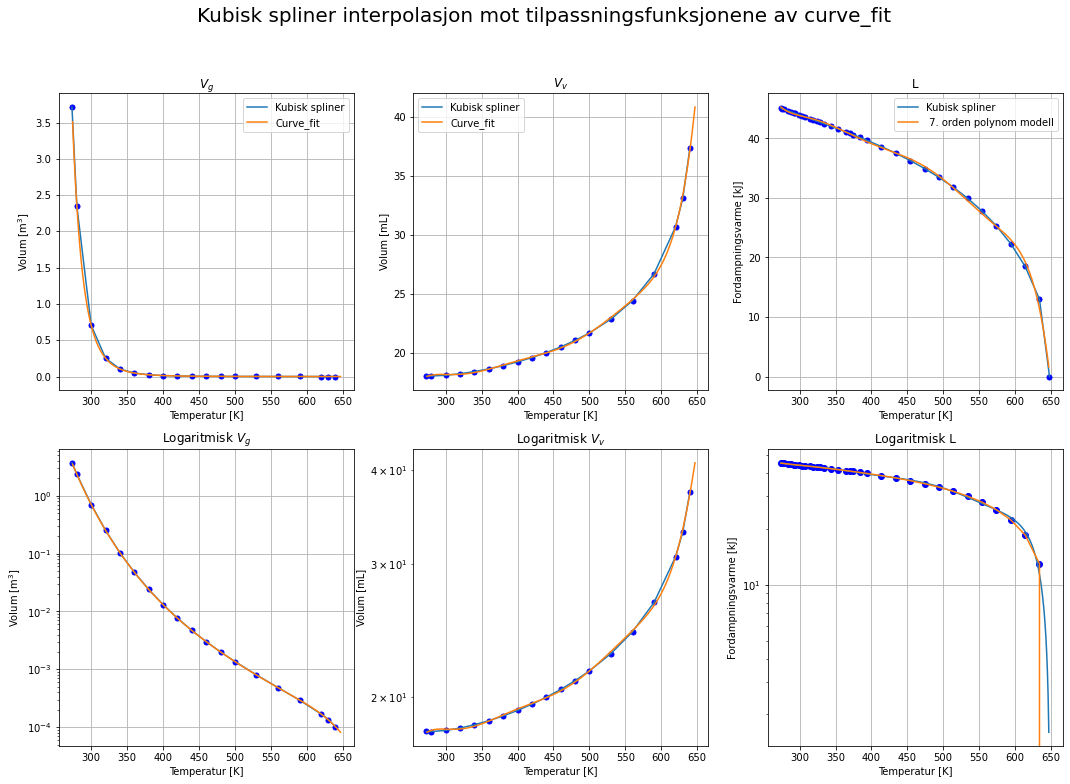

In [28]:
# Plotter grafene
fig, ax = plt.subplots(2, 3, figsize = (18, 12))
 
ax[0, 0].plot(T_exp, Vg_exp,"bo", markersize=5)
ax[0, 0].plot(T_exp, cs_Vg(T_exp), label="Kubisk spliner")
ax[0, 0].plot(T_arr, Vg_optimized(T_arr), label="Curve_fit")

ax[0, 1].plot(T_exp, Vv_exp * 1e6, "bo", markersize=5)                                  # 
ax[0, 1].plot(T_exp, cs_Vv(T_exp) * 1e6, label="Kubisk spliner")                        # Skalerer Vv med 1e6 for å gå fra [m^3] til [mL] 
ax[0, 1].plot(T_arr, Vv_optimized(T_arr) * 1e6, label="Curve_fit")                      #

ax[0, 2].plot(L_T_exp, L_exp * 1e-3, "bo", markersize=5)                                #
ax[0, 2].plot(L_T_exp, cs_L(L_T_exp) * 1e-3, label="Kubisk spliner")                    # Skalerer L med 1e-3 for å gå fra [J] til [kJ]
ax[0, 2].plot(T_arr, L_optimized_poly(T_arr) * 1e-3, label=" 7. orden polynom modell")  #

ax[0, 0].grid()
ax[0, 1].grid()
ax[0, 2].grid()

ax[0, 0].set_xlabel('Temperatur [K]')
ax[0, 0].set_ylabel('Volum [m$^3$]')
ax[0, 1].set_xlabel('Temperatur [K]')
ax[0, 1].set_ylabel('Volum [mL]')
ax[0, 2].set_xlabel('Temperatur [K]')
ax[0, 2].set_ylabel('Fordampningsvarme [kJ]')

ax[0, 0].title.set_text("$V_g$")
ax[0, 1].title.set_text("$V_v$")
ax[0, 2].title.set_text("L")

# Semilogy plotting
ax[1, 0].semilogy(T_exp, Vg_exp,"bo", markersize=5)
ax[1, 0].semilogy(T_exp, cs_Vg(T_exp))
ax[1, 0].semilogy(T_arr, Vg_optimized(T_arr))

ax[1, 1].semilogy(T_exp, Vv_exp * 1e6, "bo", markersize=5)
ax[1, 1].semilogy(T_exp, cs_Vv(T_exp) * 1e6)
ax[1, 1].semilogy(T_arr, Vv_optimized(T_arr) * 1e6)

ax[1, 2].semilogy(L_T_exp, L_exp * 1e-3, "bo") 
ax[1, 2].semilogy(T_arr, L_optimized_poly(T_arr) * 1e-3) 
ax[1, 2].semilogy(L_T_exp, cs_L(L_T_exp) * 1e-3)

ax[1, 0].grid()
ax[1, 1].grid()
ax[1, 2].grid()

ax[1, 0].set_xlabel('Temperatur [K]')
ax[1, 0].set_ylabel('Volum [m$^3$]')
ax[1, 1].set_xlabel('Temperatur [K]')
ax[1, 1].set_ylabel('Volum [mL]')
ax[1, 2].set_xlabel('Temperatur [K]')
ax[1, 2].set_ylabel('Fordampningsvarme [kJ]')

ax[0, 0].legend()
ax[0, 1].legend()
ax[0, 2].legend()

ax[1, 0].title.set_text("Logaritmisk $V_g$")
ax[1, 1].title.set_text("Logaritmisk $V_v$")
ax[1, 2].title.set_text("Logaritmisk L")

# Resten av plottingen
fig.suptitle('Kubisk spliner interpolasjon mot tilpassningsfunksjonene av curve_fit', fontsize=20)

plt.show()

Splin interpolasjon er en metode for interpolasjon, hvor et datasett er interpolert av et set av stykkevis polynomer kalt spliner. Kubisk splin interpolasjon er en splin interpolasjon der splin polynomer er av tredje orden. Bruket av kubisk splin reduserer eller løser Runge's fenomen, som er hvorfor den er preferert over bruket av polynom tilpassing. Som vi kan observere fra grafene er kubisk spline en bedre interpolasjon. Den største ulempen med bruk av kubiske spline er i tilfeller med svært varierende datapunkter, dvs hvis to tilsvarende datapunkter har stor y-forskjell, eller hvis det er et stort gap mellom to datapunkter. Heldigvis er dette ikke tilfellet i vårt datasett.

### 2e) Numerisk avvik ved bruk av interpolasjon

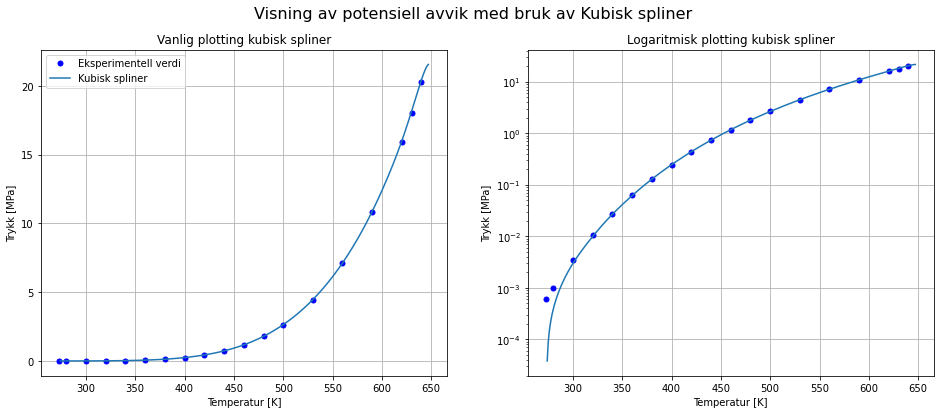

In [29]:
def p_d_cs(T):
    return cs_L(T)/(T*(cs_Vg(T)-cs_Vv(T)))

# lager kubisk spliner vektor løsning til de eksperimentelle dataene
p_cs_vals = np.zeros(len(T_arr))
p_cs_vals = simpsons_method(p_d_cs, T_exp[0], T_arr, 1000)

# Plotting
fig, ax = plt.subplots(1,2, figsize = (16, 6))

ax[0].plot(T_exp, p_exp * 1e-1,'bo', markersize = 5, label = "Eksperimentell verdi")    # Skalerer fra [Bar] til [Mpa]
ax[0].plot(T_arr, p_cs_vals * 1e-6, label = "Kubisk spliner")                           # Skalerer fra [Pa] til [Mpa]

ax[1].semilogy(T_exp, p_exp * 1e-1,'bo', markersize = 5)                               
ax[1].semilogy(T_arr, p_cs_vals * 1e-6,)   

ax[0].grid()
ax[1].grid()

ax[0].title.set_text("Vanlig plotting kubisk spliner")
ax[1].title.set_text("Logaritmisk plotting kubisk spliner")

ax[0].set_xlabel('Temperatur [K]')
ax[0].set_ylabel('Trykk [MPa]')
ax[1].set_xlabel('Temperatur [K]')
ax[1].set_ylabel('Trykk [MPa]')

fig.suptitle('Visning av potensiell avvik med bruk av Kubisk spliner', fontsize=16)
ax[0].legend( )

plt.show()

Clausius-Clapeyron-ligningen er igjen evaluert ved bruk av Simpsons metode, men nå med funksjonene for 𝐿(𝑇), $𝑉_𝑔(𝑇)$ og $𝑉_𝑣(𝑇)$. Nøyaktigheten til kurven avhenger av nøyaktigheten til numerisk integrasjon og funksjonene 𝐿(𝑇), $𝑉_𝑔(𝑇)$ og $𝑉_𝑣(𝑇)$. Selv om kurvene kan se ut til å passe dataene godt, er det derfor viktig å inspisere de logaritmiske grafene. Ved å se på disse kan det observeres at funksjonene 𝐿(𝑇), $𝑉_𝑔(𝑇)$ og $𝑉_𝑣(𝑇)$ passer dataene godt. Grafen for 𝑝(𝑇) passer ikke dataene for lavere temperaturer.

Det er to hovedfaktorer som kan føre til numeriske feil i løsningen; antall steg i temperatur-arrayen og i Simpsons metode. Å øke begge disse variablene fører imidlertid ikke til noen betydelig endring av avviket i grafene.

Dette antyder at feilen kan ligge enten i Clausius-Clapeyron-ligningen, dataene vi brukte, eller interpolasjonsmetoden vi brukte. Gitt det relativt lille antallet datapunkter vi har for den nedre enden av temperaturspekteret, er det mulig at noen verdier kan ha feil som forsterkes når kurvene interpoleres fra disse dataene. Dette kan imidlertid ikke sjekkes uten å sammenligne med ett annet datasett.

Om vi antar at dataen er korrekt, kan det være at utrykkene for $L(T), V_g(T), V_v(T)$ fører til feil i $p(T)$. Vi har da ingen måte å verifisere denne påstanden på, med tanke på at kubisk splinter var den best tilpassa metoden for $L(T), V_g(T), V_v(T)$. Vi kan ikke ssammenligne resultater med en mulignes bedre modell.

Vi kun være relativt sikre på de interpolerte verdiene i området ∼[325,640] K, utenfor dette intervallet vil interpolasjonen bli unnøyaktig, og modellen kan ikke brukes. Nedre grense kommer fra av å inspesere grafen, og høyere grense er det siste punktet vi brukte i interpolasjonen.

### 2f)  Koeeksistenskurven $p(T)$

397631.52501360443 416.5756100828219 38980.76667182109


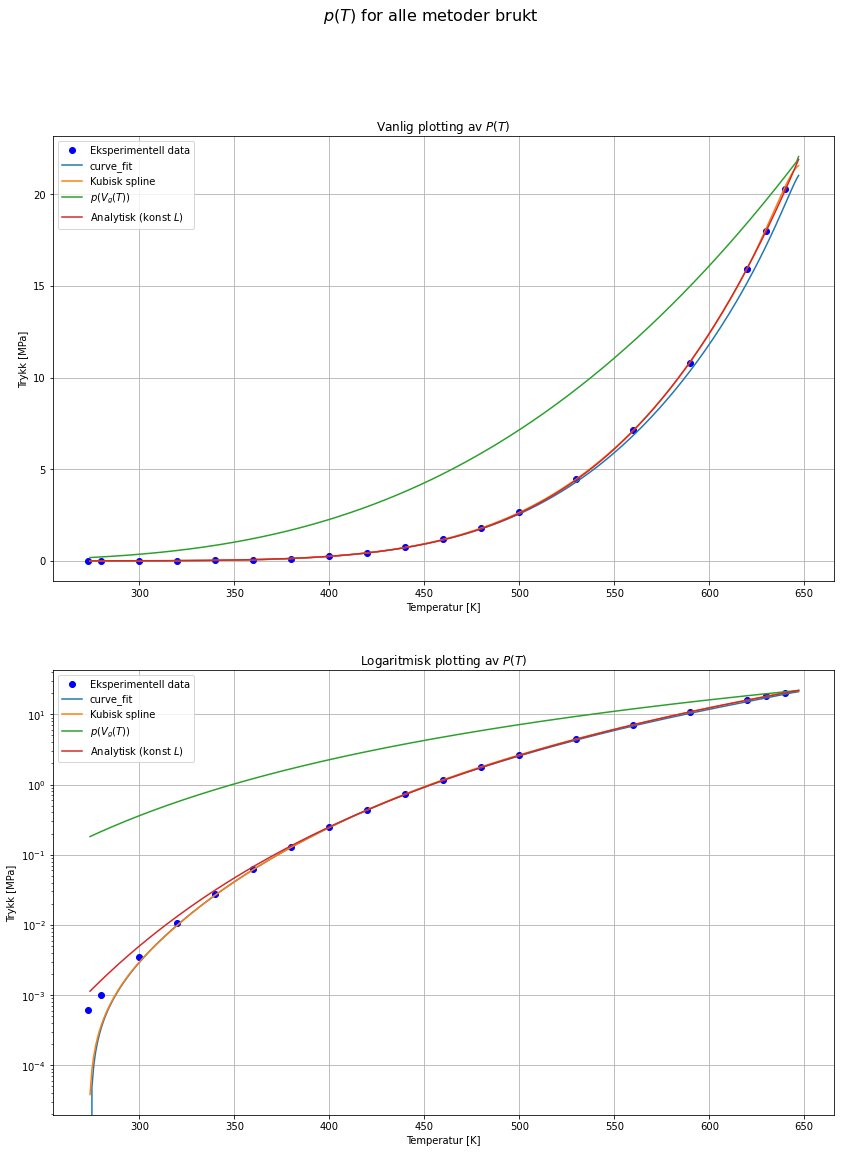

In [30]:
# Løser for konstantene i ligning 13 ved bruk av scipy
def p_const_L(T,p_0,T_0,L):
    return p_0*np.e**(L/R*(1/T_0-1/T))

const_L_vals = curve_fit(p_const_L, T_exp, p_exp * 1e+5, p0=[1e+6, 400, 10000])[0]
p_const_L = partial(p_const_L, p_0 = const_L_vals[0], T_0 = const_L_vals[1], L = const_L_vals[2])

# Printing av L, p_0 og T_0, for å vise at de er realistiske
print(const_L_vals[0], const_L_vals[1], const_L_vals[2])
    
# Plotting
fig, ax = plt.subplots(2,1, figsize = (14, 18))

ax[0].plot(T_exp, p_exp * 1e-1,'bo',label='Eksperimentell data')                     #
ax[0].plot(T_arr, p_best_fit_vals * 1e-6, label='curve_fit')                         #
ax[0].plot(T_arr, p_cs_vals * 1e-6, label = 'Kubisk spline')                         #
ax[0].plot(T_arr, p_Vv * 1e-6, label='$p(V_g(T))$')                                  #
ax[0].plot(T_arr, p_const_L(T_arr) * 1e-6, label = 'Analytisk (konst $L$)')          #
                                                                                     # Alt konverteres til [MPa]
ax[1].semilogy(T_exp, p_exp * 1e-1,'bo',label='Eksperimentell data')                 #
ax[1].semilogy(T_arr, p_best_fit_vals * 1e-6, label='curve_fit')                     #
ax[1].semilogy(T_arr, p_cs_vals * 1e-6, label = 'Kubisk spline')                     #
ax[1].semilogy(T_arr, p_Vv * 1e-6, label='$p(V_g(T))$')                              #
ax[1].semilogy(T_arr, p_const_L(T_arr) * 1e-6,label = 'Analytisk (konst $L$)')       #

ax[0].grid()
ax[1].grid()

ax[0].title.set_text("Vanlig plotting av $P(T)$")
ax[1].title.set_text("Logaritmisk plotting av $P(T)$")

ax[0].set_xlabel('Temperatur [K]')
ax[0].set_ylabel('Trykk [MPa]')
ax[1].set_xlabel('Temperatur [K]')
ax[1].set_ylabel('Trykk [MPa]')

fig.suptitle('$p(T)$ for alle metoder brukt', fontsize=16)
ax[0].legend( )
ax[1].legend( )

plt.show()

Grafen ovenfor sammenligner metodene vi brukte for å finne uttrykket for endringen i trykk som funksjon av temperaturen ved likevekt mellom væske og gass for H2O. Grafen viser nøyaktigheten til de ulike metodene. Tydeligvis er den verste metoden den som kommer fra løsningen av van der Waals ligningssystem ved bruk av Newtons metode. Cubic spline og høygrad polynommonterte data er praktisk talt identiske, med unntak av små forskjeller i slutten av dataintervallet. Det er derfor umulig å sammenligne dem nøyaktig ved å inspisere grafen. Man ville fortsatt anta at cubic spline er litt mer nøyaktig, selv om det ikke er synlig. Ved bruk av konstant L i gassligningen virker som en veldig god modell for kurve-tilpasning. Vi må da ta hensyn til at vi bestemte konstantene i utrykket med konstant L, ved å tilpasse den mot den eksperimentelle dataen for trykket, når de andre metodene har blitt tilpasset $L(T)$ $V_g(T)$ og $V_v(T)$, og da ekstrapolert videre med bruk av Clausius-Clapeyron relasjonen. Om vi brukte kubisk splinter på trykk dataen ville vi få en enda bedre modell, noe som vi ikke gjore, med tanke på at meningen var å bruke calysis clapyerion utlikheten. 

Analytisk $p(T)$ (med konstant L) følger den mer korrekte trenden, og ville sannsynligvis være en bedre tilpasning for verdiene under 274K, med tanke på at de andre alternativene faller raskt ned. Det passer imidlertid dataene dårligere for tidligere verdier, og nærmer seg dataene litt senere enn polynomtilpasningen.

Metoden som mest sannsynlig vil produsere den mest nøyaktige interpolasjonen av trykk ville vært å interpolere cubic spline direkte fra trykklikningen. Vi inkluderte den ikke i dataene, siden forutsetningen var å bruke Clausius-Clapeyron-ligningen.

## Konklusjon

Gjennom dette prosjektet har vi undersøkt oppførsen til vann langs damptrykkkurven. Vi gjore dette med bruk av analtyiske og numeriske metoder, som Newtons metode til å løse Van der Walls tilstandsligning, og numersike metoder til å interpolere modeller fra datasettene. De metodene vi brukte var Simpsons metode, kubisk splinter, og kurvetilpassing. Prosjektet har gitt oss en god gjennomgang av deler av både termisk fysikk og numerikk.

## Litteratur

Engineering ToolBox. (2018). Water - Properties at Gas-Liquid Equilibrium Conditions. Hentet fra:
$\newline$
https://www.engineeringtoolbox.com/water-properties-temperature-equilibrium-pressure-d_2099.html

Ormestad, H. (2023, 13. mars). Kritisk tilstand. $\textit{Store norske leksikon}$. Hentet fra: $\newline$
https://snl.no/kritisk_tilstand_-_fysikk

Pedersen, B. (2020, 23. desember). Trippelpunkt. $\textit{Store norske leksikon}$. Hentet fra: 
$\newline$
https://prod.liveshare.vsengsaas.visualstudio.com/join?CF1932E558EE661148A0B3F53FC9E1A1C02E

Støvneng, J. A., Aase, N. H., Kværnø, A. (2023). TMA4320 vår 2023 - prosjekt i teknisk fysikk: Damptrykk for $\textrm{H}_2\textrm{O}$. $\textit{NTNU, institutt for fysikk}$. 